<a href="https://colab.research.google.com/github/adarsh-meher/MH--Chartbuster-Prediction/blob/master/Analysis_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
'''
! pip install tpot
! pip install deap
! pip install category_encoders
! pip install h2o
'''

'\n! pip install tpot\n! pip install deap\n! pip install category_encoders\n! pip install h2o\n'

In [1]:
! git clone https://github.com/adarsh-meher/MH--Chartbuster-Prediction.git

Cloning into 'MH--Chartbuster-Prediction'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [0]:
import os
os.chdir('/content/MH--Chartbuster-Prediction')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
import spacy as sc
import hyperopt as hopt
import tpot
import category_encoders
import h2o
import time
from datetime import datetime

In [0]:
train = pd.read_csv('Data_Train.csv')
test = pd.read_csv('Data_Test.csv')

In [20]:
train.info()
#### No nulls. 7 object columns and rest integer. The target column is integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78458 entries, 0 to 78457
Data columns (total 11 columns):
Unique_ID     78458 non-null int64
Name          78458 non-null object
Genre         78458 non-null object
Country       78458 non-null object
Song_Name     78457 non-null object
Timestamp     78458 non-null object
Views         78458 non-null int64
Comments      78458 non-null int64
Likes         78458 non-null object
Popularity    78458 non-null object
Followers     78458 non-null int64
dtypes: int64(4), object(7)
memory usage: 6.6+ MB


In [22]:
test.info()
### No nulls.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19615 entries, 0 to 19614
Data columns (total 10 columns):
Unique_ID     19615 non-null int64
Name          19615 non-null object
Genre         19615 non-null object
Country       19615 non-null object
Song_Name     19615 non-null object
Timestamp     19615 non-null object
Comments      19615 non-null int64
Likes         19615 non-null object
Popularity    19615 non-null object
Followers     19615 non-null int64
dtypes: int64(3), object(7)
memory usage: 1.5+ MB


In [23]:
train.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


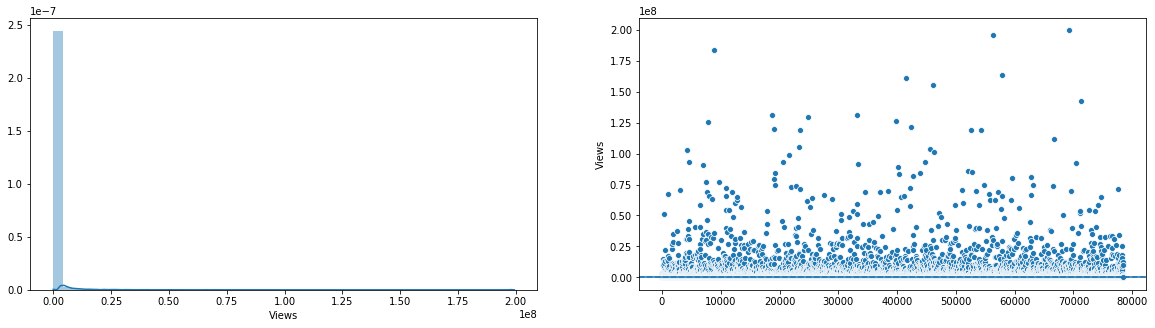

In [38]:
#### Plotting distribution of views

fig,axs = plt.subplots(1,2,figsize = (20,5))
ax = axs[0]
sb.distplot(train['Views'],ax = ax)

ax = axs[1]
mean = train['Views'].mean()
med = train['Views'].median()
sb.scatterplot(x = train.index,y = train['Views'],ax = ax)
ax.axhline(mean,ls = '--')
ax.axhline(med,ls = 'solid')

#### We can see that the target dist is highly right skewed. The mean and median both lie at the lower end. We can try transformations to make it approx normal. 